In [ ]:
!unzip '/content/drive/MyDrive/Animal_Dataset.zip'

Archive:  /content/drive/MyDrive/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
 

Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/dataset/Training',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 1238 images belonging to 4 classes.


In [ ]:
xtest = test_datagen.flow_from_directory('/content/dataset/Testing',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 326 images belonging to 4 classes.


CNN model training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

Input layer

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

Minimum 1 Convolution & 1 Pooling layer

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

1 Flatten layer

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


Minimum of 2 Hidden layers

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

Output layer

In [ ]:
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
len(xtrain)

13

In [36]:
model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=25,validation_data=xtest,validation_steps=len(xtest))

<ipython-input-36-d8eb07bc0d1d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=25,validation_data=xtest,validation_steps=len(xtest))


Epoch 1/25
13/13 [==============================] - 17s 1s/step - loss: 2.9551 - accuracy: 0.2746 - val_loss: 1.3778 - val_accuracy: 0.2239
Epoch 2/25
13/13 [==============================] - 16s 1s/step - loss: 1.4232 - accuracy: 0.2843 - val_loss: 1.3683 - val_accuracy: 0.2607
Epoch 3/25
13/13 [==============================] - 16s 1s/step - loss: 1.2526 - accuracy: 0.4435 - val_loss: 1.1700 - val_accuracy: 0.4693
Epoch 4/25
13/13 [==============================] - 16s 1s/step - loss: 1.0742 - accuracy: 0.5638 - val_loss: 0.9024 - val_accuracy: 0.6656
Epoch 5/25
13/13 [==============================] - 21s 2s/step - loss: 0.9112 - accuracy: 0.6389 - val_loss: 0.8737 - val_accuracy: 0.6350
Epoch 6/25
13/13 [==============================] - 15s 1s/step - loss: 0.8033 - accuracy: 0.6866 - val_loss: 0.7241 - val_accuracy: 0.7270
Epoch 7/25
13/13 [==============================] - 16s 1s/step - loss: 0.7138 - accuracy: 0.7246 - val_loss: 0.7432 - val_accuracy: 0.7239
Epoch 8/25
13/13 [==

In [37]:
model.save('animal.h5')

Test the Model

In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np

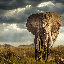

In [40]:
img = image.load_img('/content/2f3534e28e.jpg',target_size=(64,64))
img

In [41]:
x = image.img_to_array(img)
x

array([[[ 51.,  56.,  60.],
        [ 50.,  55.,  59.],
        [ 49.,  54.,  58.],
        ...,
        [ 63.,  69.,  69.],
        [ 64.,  73.,  72.],
        [ 69.,  78.,  77.]],

       [[ 55.,  60.,  63.],
        [ 55.,  60.,  64.],
        [ 58.,  63.,  67.],
        ...,
        [ 61.,  67.,  67.],
        [ 58.,  64.,  64.],
        [ 59.,  65.,  65.]],

       [[ 73.,  77.,  78.],
        [ 77.,  81.,  82.],
        [ 79.,  83.,  84.],
        ...,
        [ 63.,  69.,  67.],
        [ 56.,  61.,  64.],
        [ 55.,  60.,  63.]],

       ...,

       [[ 25.,  23.,   2.],
        [127.,  96.,  49.],
        [ 86.,  76.,  14.],
        ...,
        [ 33.,  17.,   2.],
        [ 54.,  25.,  17.],
        [ 46.,  50.,  13.]],

       [[ 71.,  52.,  20.],
        [103.,  83.,  46.],
        [112.,  79.,  28.],
        ...,
        [ 62.,  45.,  29.],
        [ 42.,  21.,  28.],
        [140., 117.,  50.]],

       [[123.,  84.,  45.],
        [118.,  84.,  38.],
        [ 83.,  

In [42]:
img = np.expand_dims(x,axis=0)
img

array([[[[ 51.,  56.,  60.],
         [ 50.,  55.,  59.],
         [ 49.,  54.,  58.],
         ...,
         [ 63.,  69.,  69.],
         [ 64.,  73.,  72.],
         [ 69.,  78.,  77.]],

        [[ 55.,  60.,  63.],
         [ 55.,  60.,  64.],
         [ 58.,  63.,  67.],
         ...,
         [ 61.,  67.,  67.],
         [ 58.,  64.,  64.],
         [ 59.,  65.,  65.]],

        [[ 73.,  77.,  78.],
         [ 77.,  81.,  82.],
         [ 79.,  83.,  84.],
         ...,
         [ 63.,  69.,  67.],
         [ 56.,  61.,  64.],
         [ 55.,  60.,  63.]],

        ...,

        [[ 25.,  23.,   2.],
         [127.,  96.,  49.],
         [ 86.,  76.,  14.],
         ...,
         [ 33.,  17.,   2.],
         [ 54.,  25.,  17.],
         [ 46.,  50.,  13.]],

        [[ 71.,  52.,  20.],
         [103.,  83.,  46.],
         [112.,  79.,  28.],
         ...,
         [ 62.,  45.,  29.],
         [ 42.,  21.,  28.],
         [140., 117.,  50.]],

        [[123.,  84.,  45.],
       

In [43]:
pred = model.predict(img)
pred

1/1 [==============================] - 0s 129ms/step


array([[0., 0., 1., 0.]], dtype=float32)

In [44]:
np.argmax(pred)

2

In [45]:
op = ['bears','crows','elephants','rats'] 
op[np.argmax(pred)] 

'elephants'